<a href="https://colab.research.google.com/github/Omar-Works/ID-2024/blob/main/Inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef

def find_result():
    predictions = model.predict(test_generator)
    predictions = (predictions > 0.5).astype(int).flatten()  # Convert to binary labels

    # True labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, predictions)
    classification_error = 1 - accuracy
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    specificity = recall_score(y_true, predictions, pos_label=0)
    fall_out = 1 - specificity
    mcc = matthews_corrcoef(y_true, predictions)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Fall-Out:", fall_out)
    print("Matthews Correlation Coefficient:", mcc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, predictions))
    print("Classification Report:\n", classification_report(y_true, predictions))


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Add a fully connected layer
x = tf.keras.layers.Dropout(0.5)(x)   # Add dropout for regularization
#predictions = Dense(2, activation='softmax')(x)  # 2 classes for one-hot encoded labels
predictions = Dense(1, activation='sigmoid')(x)  # 1 node for binary classification


model = Model(inputs=base_model.input, outputs=predictions)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest', validation_split=0.2
)

# Evaluate the model on the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for single-output
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for single-output
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for single-output
    shuffle=False
)


Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [5]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stopping]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.6289 - loss: 0.7133 - val_accuracy: 0.8916 - val_loss: 0.3305
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.8449 - loss: 0.3461 - val_accuracy: 0.9157 - val_loss: 0.2114
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.8733 - loss: 0.3300 - val_accuracy: 0.8795 - val_loss: 0.2244
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 401ms/step - accuracy: 0.8741 - loss: 0.2927 - val_accuracy: 0.9398 - val_loss: 0.1763
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 456ms/step - accuracy: 0.8804 - loss: 0.2976 - val_accuracy: 0.9398 - val_loss: 0.1716
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.9077 - loss: 0.2501 - val_accuracy: 0.9157 - val_loss: 0.1892
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.8760 - loss: 0.3398 - val_accuracy: 0.9157 - val_loss: 0.2391
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.8888 - loss: 0.2907 - val_accuracy: 0.9277 - va

In [6]:
find_result()

5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step
Accuracy: 0.9253731343283582
Classification Error: 0.07462686567164178
Precision: 0.9024390243902439
Recall (Sensitivity): 0.8604651162790697
F1 Score: 0.8809523809523809
Specificity: 0.9560439560439561
Fall-Out: 0.04395604395604391
Matthews Correlation Coefficient: 0.8271466895097705
Confusion Matrix:
 [[87  4]
 [ 6 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        91
           1       0.90      0.86      0.88        43

    accuracy                           0.93       134
   macro avg       0.92      0.91      0.91       134
weighted avg       0.92      0.93      0.92       134



In [7]:
result = model.evaluate(test_generator)  # Assuming test_generator is defined
print('Test Loss:', result[0])
print('Test Accuracy:', result[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 704ms/step - accuracy: 0.9348 - loss: 0.1142
Test Loss: 0.12940649688243866
Test Accuracy: 0.9253731369972229


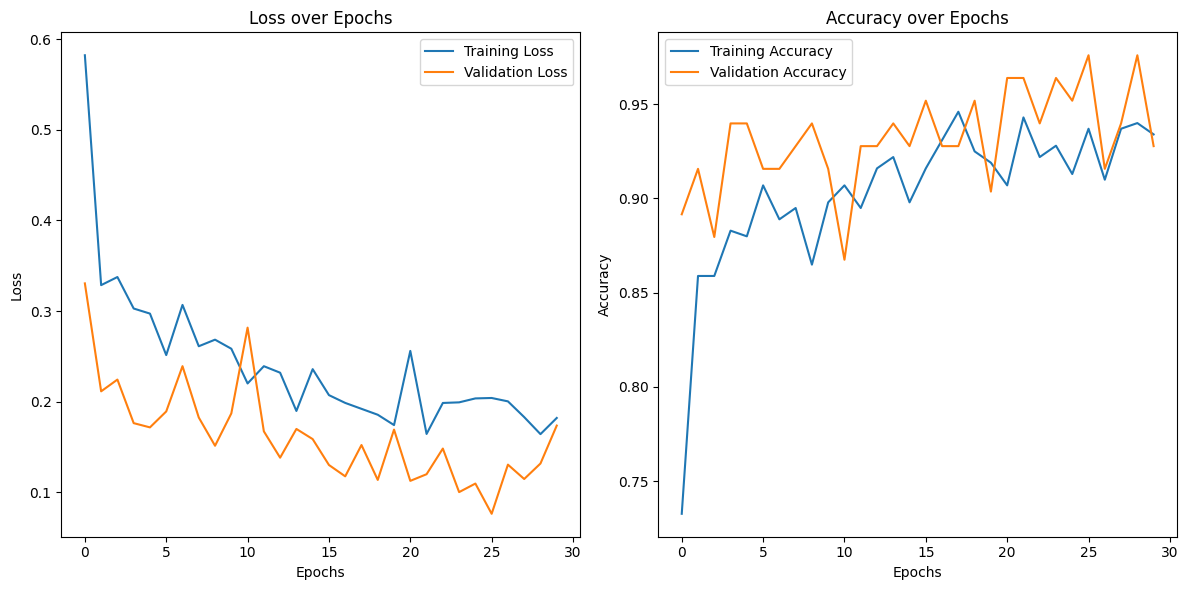

In [8]:
# Import Matplotlib
import matplotlib.pyplot as plt # This line imports the 'pyplot' module from Matplotlib and assigns it the alias 'plt'

# Plotting the loss
plt.figure(figsize=(12, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Save the model
model.save('malaria_detection_inceptionv3_model.h5')
